In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Explorative Data Analysis
>



Library Declaration


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import mean_squared_error
from math import sqrt
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading the DataSet

In [ ]:
bike_day_df=pd.read_csv('/content/drive/My Drive/Copy of day.csv')
bike_hour_df=pd.read_csv('/content/drive/My Drive/Copy of hour.csv')


In [ ]:
test = pd.read_csv('/content/drive/My Drive/Copy of hour.csv')

Shape of the DataSet

In [ ]:
bike_hour_df.shape

(17379, 17)

In [ ]:
bike_day_df.shape

(731, 16)

In [ ]:
bike_hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Renaming the attributes

In [ ]:
bike_hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','hr':'hour','weathersit':'weather',
                       'hum':'humidity','cnt':'count'},inplace=True)
bike_hour_df.head()

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bike_day_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather',
                       'hum':'humidity','cnt':'count'},inplace=True)
bike_day_df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bike_hour_df['count'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: count, dtype: float64

Visualising Missing values

In [ ]:
bike_hour_df.isnull().sum() 

rec_id        0
datetime      0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Data Visualization

Hour Wise Distribution of count

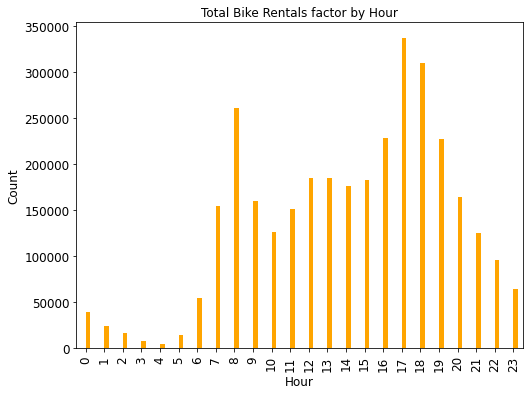

In [ ]:
ax = bike_hour_df[['hour','count']].groupby(['hour']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals factor by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()


Month Wise Distribution of count

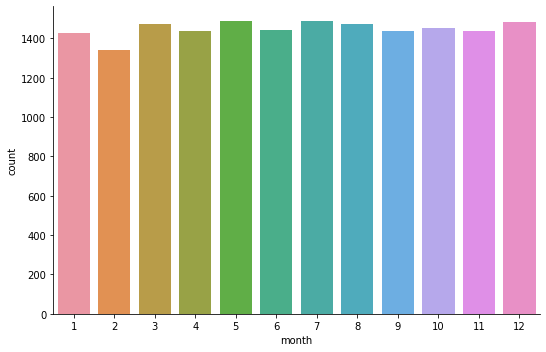

In [ ]:
sns.factorplot(x='month',data=bike_hour_df,kind='count',size=5,aspect=1.5)

Season:
1-> spring,
2 -> summer,
3 -> fall,
4 -> winter

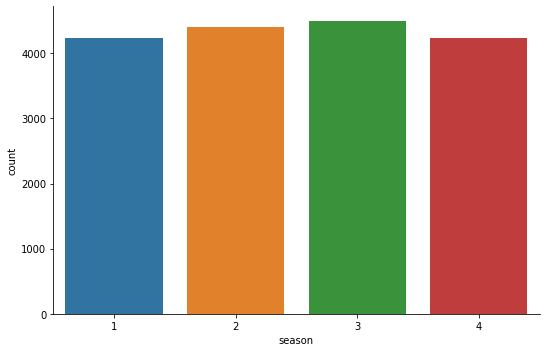

In [ ]:
sns.factorplot(x='season',data=bike_hour_df,kind='count',size=5,aspect=1.5)


Working day :  0-> No workingday, 1-> workingday

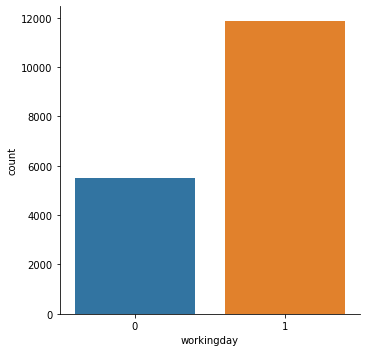

In [ ]:
bike_hour_df.workingday.value_counts()
sns.factorplot(x='workingday',data=bike_hour_df,kind='count',size=5,aspect=1)

Weather

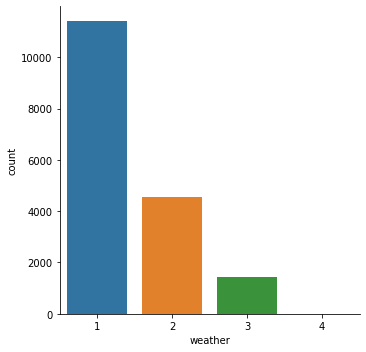

In [ ]:
bike_hour_df.weather.value_counts()
sns.factorplot(x='weather',data=bike_hour_df,kind='count',size=5,aspect=1)  

Year wise Distribution of count : year 0-> 2011, year 1-> 2012

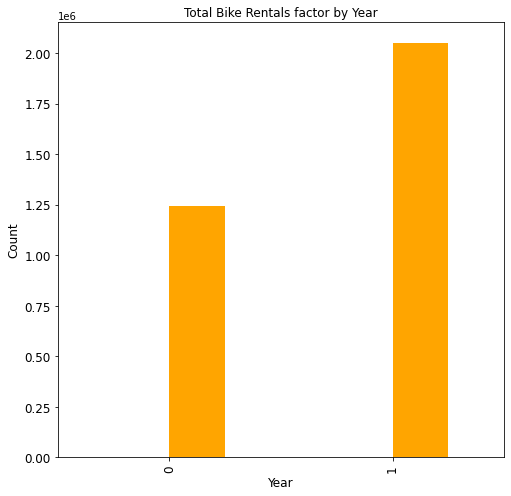

In [ ]:
ax = bike_hour_df[['year','count']].groupby(['year']).sum().reset_index().plot(kind='bar', figsize=(8, 8),
                                       legend = False, title ="Total Bike Rentals factor by Year", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()


Data Visualization

Correlation matrix

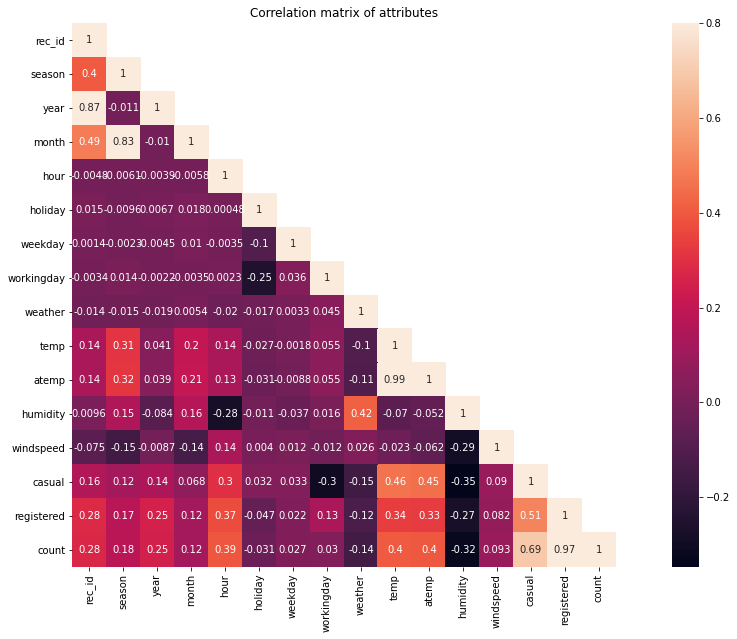

In [ ]:
correMtr=bike_hour_df.corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

Feature Engineering

Season

In [ ]:
season=pd.get_dummies(bike_hour_df['season'],prefix='season')
bike_hour_df=pd.concat([bike_hour_df,season],axis=1)
bike_hour_df.head()


,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0


Weather

In [ ]:
weather=pd.get_dummies(bike_hour_df['weather'],prefix='weather')
bike_hour_df=pd.concat([bike_hour_df,weather],axis=1)
bike_hour_df.head()

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0


Drop Season and Weather coloumns

In [ ]:
bike_hour_df.drop(['season','weather'],inplace=True,axis=1)

Splitting Time and Date

In [ ]:
bike_hour_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(bike_hour_df.datetime)]
bike_hour_df.head()

,rec_id,datetime,year,month,hour,holiday,weekday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,day
0,1,2011-01-01,0,1,0,0,6,0,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,5
1,2,2011-01-01,0,1,1,0,6,0,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,5
2,3,2011-01-01,0,1,2,0,6,0,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,5
3,4,2011-01-01,0,1,3,0,6,0,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,5
4,5,2011-01-01,0,1,4,0,6,0,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,5


Drop date time column

In [ ]:
bike_hour_df.head()

,rec_id,datetime,year,month,hour,holiday,weekday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,day
0,1,2011-01-01,0,1,0,0,6,0,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,5
1,2,2011-01-01,0,1,1,0,6,0,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,5
2,3,2011-01-01,0,1,2,0,6,0,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,5
3,4,2011-01-01,0,1,3,0,6,0,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,5
4,5,2011-01-01,0,1,4,0,6,0,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,5


In [ ]:
bike_hour_df.drop('datetime',axis=1,inplace=True)
bike_hour_df.head()

,rec_id,year,month,hour,holiday,weekday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,day
0,1,0,1,0,0,6,0,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,5
1,2,0,1,1,0,6,0,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,5
2,3,0,1,2,0,6,0,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,5
3,4,0,1,3,0,6,0,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,5
4,5,0,1,4,0,6,0,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,5


Drop Casual registered columns

In [ ]:
bike_day_df.drop(['casual','registered'],axis=1,inplace=True)
bike_hour_df.drop(['casual','registered'],axis=1,inplace=True)

correlation map

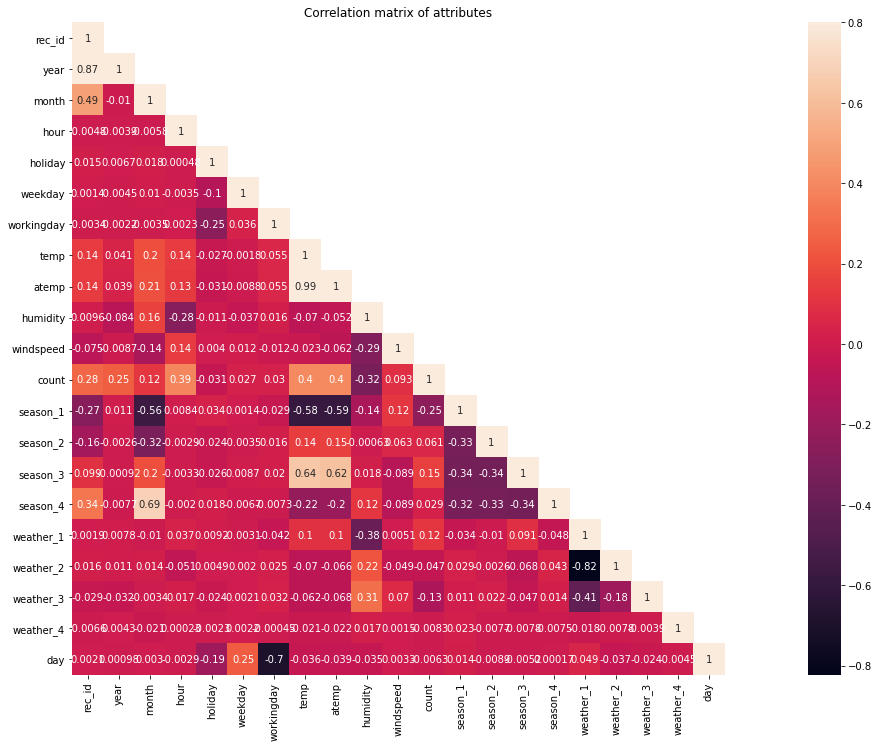

In [ ]:
correMtr=bike_hour_df.corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(30,12))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [ ]:
bike_hour_df = bike_hour_df[['rec_id','year','month','day','hour','holiday','weekday','workingday','temp','atemp','humidity','windspeed','season_1','season_2','season_3','season_4','weather_1','weather_2','weather_3','weather_4','count']]

Splitting the dataset into test and train datasets

In [ ]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

X_train,X_test,y_train,y_test=train_test_split(bike_hour_df.iloc[:,0:-1],bike_hour_df.iloc[:,-1],test_size=0.3, random_state=42)


In [ ]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

Linear Regression model

In [ ]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [ ]:
#Root Mean Square error
rmse = math.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,y_pred_test)
print('Mean absolute error :',mae)

from sklearn.metrics import mean_squared_log_error
from math import sqrt
print('RMSLE :',rmsle(y_pred_test,y_test))


Root mean square error : 141.8863808660845
Mean absolute error : 103.93842555706928
RMSLE : 1.1975547237339124


------------------------------------------------------------

Polynomials

In [ ]:
bikes_df= bike_hour_df.copy()

X_train,X_test,y_train,y_test=train_test_split(bikes_df.iloc[:,0:-1],bikes_df.iloc[:,-1],test_size=0.3, random_state=42)


from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(2)
X_train = poly_feat.fit_transform(X_train)
X_test = poly_feat.fit_transform(X_test)

In [ ]:
from sklearn import linear_model
lr_model= linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [ ]:
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))
mae=metrics.mean_absolute_error(y_test,y_pred)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred,y_test))

Root Mean squared error : 118.97
Mean absolute error : 89.76
RMSLE : 1.10 


Decision Tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [ ]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn import tree
import pydot
import graphviz

dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 

In [ ]:
dtr_pred=dtr.predict(X_test)
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print("Root mean square error : %.2f"%rmse)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(dtr_pred,y_test))

Root mean square error : 111.00
Mean absolute error : 79.13
RMSLE : 0.92 


In [ ]:
d={'y_test':y_test,'y_pred':dtr_pred}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False)
ans.head()

,y_test,y_pred
12830,425,417.517799
8688,88,137.278159
7091,4,32.204064
12230,526,417.517799
431,13,32.204064


Random Forest Regressor

In [ ]:
bikes_df1= bike_hour_df.copy()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bikes_df1.iloc[:,0:-1],bikes_df1.iloc[:,-1],test_size=0.3, random_state=42)

Fit the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test) 

In [ ]:
print("Root Mean squared error : %.2f"% sqrt(mean_squared_error(y_test, y_pred)))
mae=metrics.mean_absolute_error(y_test,y_pred)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred,y_test))

Root Mean squared error : 40.15
Mean absolute error : 23.96
RMSLE : 0.35 


In [ ]:
d={'y_test':y_test,'y_pred':y_pred}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False)
ans.head()

,y_test,y_pred
12830,425,375.710000
8688,88,108.056667
7091,4,11.850000
12230,526,539.570000
431,13,14.306667
